In [1]:
# nvidia ticker: NVDA

In [ ]:
import yfinance as yf       
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp


In [3]:
# set global variables: 
period = 10     # analyze 10 years of data
nvidia = yf.Ticker('NVDA')

In [4]:
# set understandable display in pandas
pd.options.display.float_format = "{:,.2f}".format


### Investigating the yfinance Ticker class: 

In [ ]:
nvidia.info # info about the compaany, industry, sector, size, specific data points, low, high averrage,

# dates
nvidia.calendar # dividends, earnings ad revenues
nvidia.actions      # dividends and stock splits

#analysis
nvidia.analyst_price_targets    # (dict)selected prices of the day: current high low mean median

# financials
nvidia.balance_sheet
nvidia.income_stmt     #yearly
nvidia.quarterly_income_stmt  
# historical market data
nvidia.history(period='1mo')    # Open, close, high low, volum, dividends, splits, default - 1m

# options
nvidia.option_chain(nvidia.options[0]).calls        # option transactions

# additional
nvidia.recommendations
nvidia.sec_filings


### Getting to know the data: 
the purpose of getting to know the data is to be able to analyze it better, understand the results and connect possible causalities. 

### Prior Knowledge
the Nvidia share is a good example for such data
on one hand yfinance provides it clean and complete: no missing values and ready to work data types. 
the column names were changed for convenience, but that's all. 
on the other hand, given the share of this compnay is standing in the center of interest of several global events in the past few years, it gives us a great oportunity to try to understand the effect that outliers might have on a dataset. 

first and foremost, let's look at the general data, and compare it with a simple comparison to its financial results. 
we can see a similar trend in both, but the share price is very volatile 
relevant major events: 
| Event                                | Date              | Description                                                                                                                                               |
| ------------------------------------ | ----------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Cryptocurrency Boom (2017)       | December 17, 2017 | Bitcoin reached its all-time high of \$19,783.06, marking the peak of the 2017 cryptocurrency bubble, amid a speculative frenzy fueled by the rise of blockchain-based ventures, ICOs, NFTs, and numerous trading platforms.                                                     |
| Cryptocurrency Dive                  |	Nov 2018       |	Crypto markets experienced a sharp decline starting in early 2018, during whic major security breaches like the $530 million Coincheck hack in January 2018 could be seen, and growing regulatory scrutiny over unregulated ICOs. By November 2018, Bitcoin's value had plummeted by approximately 80% from its peak and the entire cryptocurrency market took a sharp dive.
| COVID-19 Market Crash            | March 9, 2020     | Global markets plunged due to the COVID-19 pandemic, with the Dow Jones Industrial Average falling over 2,000 points, triggering a circuit breaker halt.  |
| ChatGPT Launch                   | November 30, 2022 | OpenAI released ChatGPT, sparking widespread interest in AI and influencing tech stocks.                                                                  |
| Russia Invades Ukraine           | February 24, 2022 | Russia initiated a full-scale invasion of Ukraine, leading to geopolitical tensions and market volatility.                                                |
| China-Taiwan Tensions Escalate   | April 8, 2023     | China commenced significant military exercises around Taiwan, heightening cross-strait tensions.                                                          |
| DeepSeek Chatbot Launch          | January 10, 2025  | Chinese AI company DeepSeek launched its chatbot, intensifying competition in the AI sector.                                                              |
| Trump's 'Liberation Day' Tariffs | April 2, 2025     | President Trump announced sweeping tariffs, initiating a global trade war and causing market disruptions.                                                 |


First step - define the period and collect the data: collect historical data for nvidia for the past 10 years, in a daily interval. 
this data inclludes: 
Open, High, Low, close prices, as well as volumes for every trading day. additionally - dividends and share splits. 

In [184]:
# set period limits:
end_date = datetime.fromisoformat('2025-05-28 00:00:00-04:00')
start = end_date.replace(year=end_date.year -10)


datetime.datetime(2005, 5, 28, 0, 0, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000)))

In [ ]:
df = nvidia.history(interval='1d', start=start, end=end_date)

In [7]:
# investigate actions: 
actions = nvidia.actions
actions.loc[actions['Stock Splits'] != 0]

,Dividends,Stock Splits
Date,,
2000-06-27 00:00:00-04:00,0.00,2.00
2001-09-10 00:00:00-04:00,0.00,2.00
2006-04-07 00:00:00-04:00,0.00,2.00
2007-09-11 00:00:00-04:00,0.00,1.50
2021-07-20 00:00:00-04:00,0.00,4.00
2024-06-10 00:00:00-04:00,0.00,10.00


analysis: 
1. first, check the data raw shape and characteristics. it is expected to include missing 'NAN' values for days which are not trading days, or, jump in index dates for non trading dates.  
yfinance provides the data as a pandas dataframe, with date as index. non trading dates are not shown in the raw data. 
the missing dates in  the index should not be affect the analysis, since the trading dates are mostly regular.  
2. check for missing values

In [8]:
# check how many rows and view data
print(f'data shape: {df.shape}')
df

data shape: (2516, 7)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-05-28 00:00:00-04:00,0.53,0.54,0.53,0.54,327656000,0.00,0.00
2015-05-29 00:00:00-04:00,0.54,0.54,0.53,0.54,335168000,0.00,0.00
2015-06-01 00:00:00-04:00,0.54,0.55,0.54,0.54,372660000,0.00,0.00
2015-06-02 00:00:00-04:00,0.54,0.54,0.53,0.53,224304000,0.00,0.00
2015-06-03 00:00:00-04:00,0.53,0.54,0.52,0.53,250788000,0.00,0.00
...,...,...,...,...,...,...,...
2025-05-21 00:00:00-04:00,133.06,137.40,130.59,131.80,270608700,0.00,0.00
2025-05-22 00:00:00-04:00,132.23,134.25,131.55,132.83,187344000,0.00,0.00
2025-05-23 00:00:00-04:00,130.00,132.68,129.16,131.29,198821300,0.00,0.00


In [9]:
# handle dataframe visibility and usability: 

# change the index visuality to a date format, not datetime with nano-seconds:
df.index = pd.to_datetime(df.index.date)

# change column names for usability:
df.columns = [col.replace(" ", "_").lower() for col in df.columns]


In [12]:
# check for data types - expecting nummerical values (float, int), and datetime dates. 
print(f'index type: {type(df.index)}')
df.dtypes


index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


open            float64
high            float64
low             float64
close           float64
volume            int64
dividends       float64
stock_splits    float64
dtype: object

In [13]:
# check for missing values
df.isna().sum()

open            0
high            0
low             0
close           0
volume          0
dividends       0
stock_splits    0
dtype: int64

In [ ]:
# descriptive statistics: 
overall_stats = df.describe()
overall_stats.name = 'Nvidia Stock data: Overall Statistics'
print(overall_stats.name)
overall_stats[['close', 'volume']]

Nvidia Stock data: Overall Statistics


,close,volume
count,"2,516.00","2,516.00"
mean,25.62,"467,544,143.23"
std,37.69,"253,233,442.71"
min,0.47,"32,499,962.00"
25%,3.89,"303,701,250.00"
50%,8.74,"414,817,500.00"
75%,24.70,"564,449,000.00"
max,149.42,"3,692,928,000.00"


### what information do the split and dividend columns have? 

In [ ]:
# how many splits events are there? 
splits = df.loc[df['stock_splits'] > 0]

In [ ]:
# how many times was dividend distributed? 
dividend = df.loc[df['dividends'] > 0]

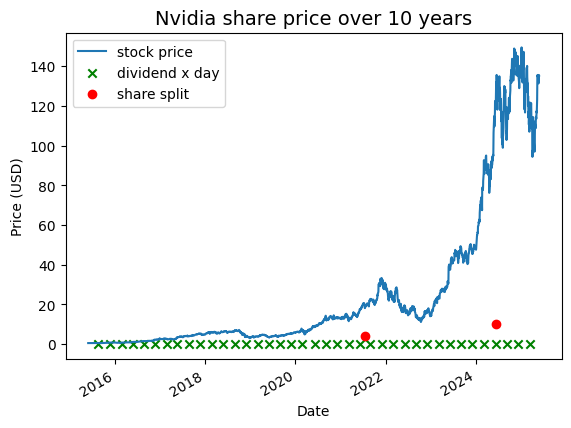

In [128]:
# plot: are dividends and splits significant? indications? 
df.close.plot(label = 'stock price')
plt.title('Nvidia share price over 10 years', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.scatter(dividend.index, dividend['dividends'], marker='x', color='g', label=('dividend x day'))
plt.scatter(splits.index, splits['stock_splits'], marker='o', color='r', label='share split')
plt.legend(loc='best')


Text(0, 0.5, 'Price (USD)')

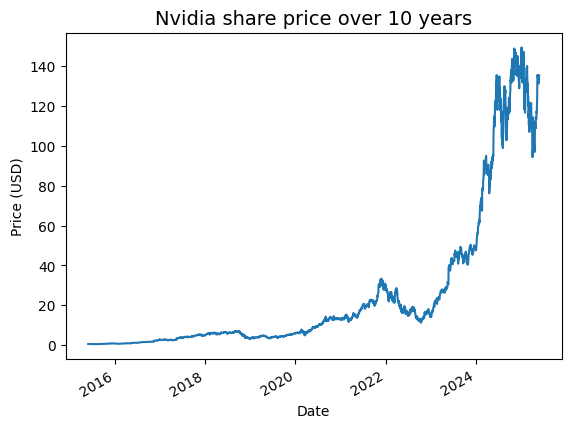

In [14]:
df.close.plot()
plt.title('Nvidia share price over 10 years', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price (USD)')



A simple view of the prices for the entire period
- A line chart for the daily close price of the share in the time period.
- this line shows that Nvidia is a good show case for the turbulances that happened in the world in the past decade: 
as a main player in the chip industry, Nvidia's share affected, and was affected from many events
- the first clear climb of the share price was during the period 2017-2021  where the crypto market surge took place, with a clear drop in 2019. many coins and companies were founded and ICOs were offered during this period, including the NFT wave. Coin mining requires high computation capaabilities, which draw attention to the company and its share. The 2019 drop resonates with the biggest bitcoin platform robbery, and loss of faith in the ICO markets, in the face of insufficiant regulations.
next visible drop is at Covid 19 virus outburst in March 2021, viewed here in high volatility, and the beginning of the steep, yet very volatile increase, that started with the entry of the language models into the world, followed by the war in Ukraine, the threats of China on Taiwan, and the more current entry of the Chinese DeepSeek model, that promised cheap computation power, than the US president Trump declaration of increasing customs, which shocked the markets.  
All these events had part in influencing the course of the Nvidia share. To these we should add profitability reporting of the ocmpany itself, and other developments made by competitors and the industry.  

we know that the stock price increased greatly during the years, it is interesting to see what happened to the volatility: 
is the Nvidia price today as volatile as it was in the beginning of its way, before recent technological and global geo-political developments? 

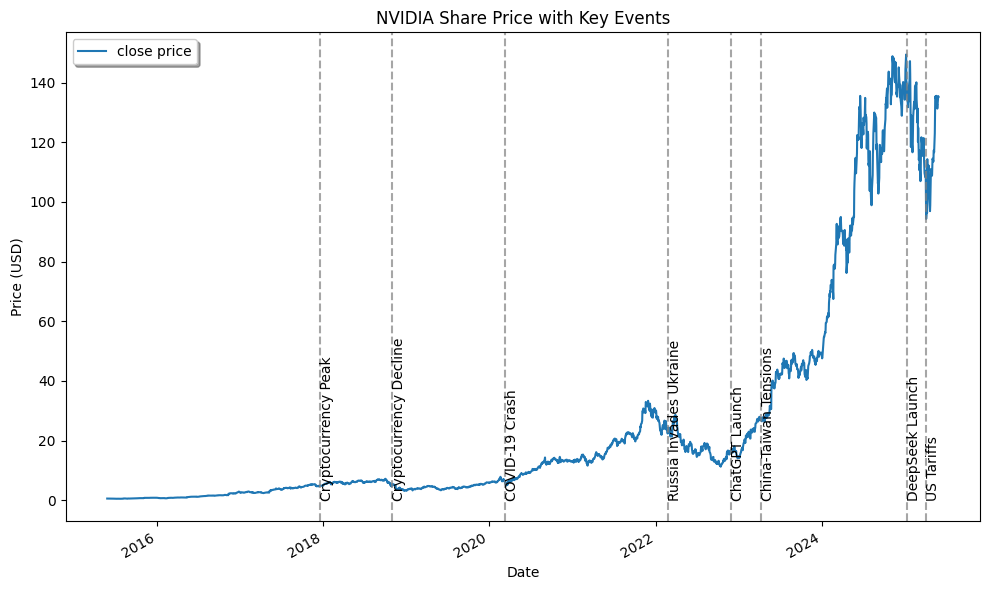

In [185]:
# plotting price with indicators for major event impact:

event_dates = {
    'Cryptocurrency Peak': '2017-12-17',
    'Cryptocurrency Decline': '2018-11-01',
    'COVID-19 Crash': '2020-03-09',
    'ChatGPT Launch': '2022-11-30',
    'Russia Invades Ukraine': '2022-02-24',
    'China-Taiwan Tensions': '2023-04-08',
    'DeepSeek Launch': '2025-01-10',
    "US Tariffs": '2025-04-02'
}
event_dates = {label: pd.to_datetime(date) for label, date in event_dates.items()}
ax = df.close.plot(figsize=(10,6), label='close price')

for label, date in event_dates.items():
    plt.axvline(x=date, color='gray', linestyle='--', alpha=0.7)
    plt.text(date, plt.ylim()[0]*0.05, label, rotation=90, verticalalignment='bottom', fontsize=10, color='black')

plt.title("NVIDIA Share Price with Key Events")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

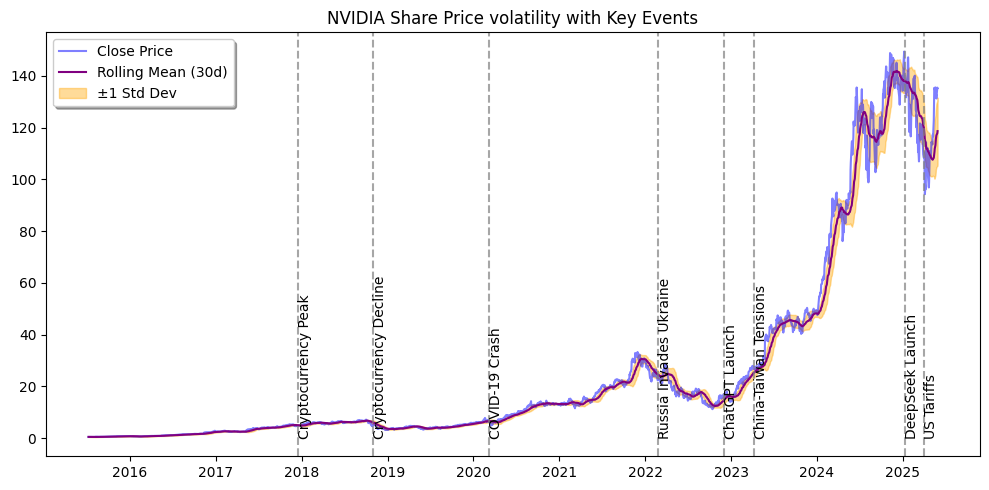

In [119]:
# plotting share price with events impact, smoothed moving average 30 days, and volatility spreads: 
df_rolling = df[['close']].copy()
df_rolling['roll30'] = df_rolling.close.rolling(30).mean()
df_rolling['std'] = df_rolling.close.rolling(30).std()
#df_rolling.dropna(inplace=True)
# std distance from mean: 
df_rolling['high_std'] = df_rolling['roll30'] + df_rolling['std']
df_rolling['low_std'] = df_rolling['roll30'] - df_rolling['std']
df_rolling.dropna(inplace=True)

fig = plt.figure(figsize=(10, 5))
plt.plot(df_rolling.index, df_rolling['close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(df_rolling.index, df_rolling['roll30'], label='Rolling Mean (30d)', color='purple')
plt.fill_between(df_rolling.index, df_rolling['low_std'], df_rolling['high_std'], color='orange', alpha=0.4, label='±1 Std Dev')

for label, date in event_dates.items():
    plt.axvline(x=date, color='gray', linestyle='--', alpha=0.7)
    plt.text(date, plt.ylim()[0]*0.05, label, rotation=90, verticalalignment='bottom', fontsize=10, color='black')

plt.title("NVIDIA Share Price volatility with Key Events")
plt.legend(shadow=True)
plt.tight_layout()
plt.show()

from this chart we can see that generally, with hte increase of the share price the volatility spread is increasing. 

In [ ]:
# when did the trade volume peak? what is the yearly average?
print(f'date of maximum volume: \n {df['volume'].loc[df['volume'] == df['volume'].max()]}')

year_mean = df.groupby(df.index.year).mean()
year_mean

date of maximum volume: 
 2017-06-09    3692928000
Name: volume, dtype: int64


,open,high,low,close,volume,dividends,stock_splits
2015,0.61,0.62,0.60,0.61,"332,098,233.77",0.00,0.00
2016,1.32,1.34,1.30,1.32,"442,851,603.17",0.00,0.00
2017,3.70,3.75,3.64,3.70,"685,866,406.37",0.00,0.00
2018,5.76,5.85,5.66,5.75,"548,086,087.65",0.00,0.00
2019,4.33,4.40,4.27,4.34,"456,399,666.67",0.00,0.00
2020,9.86,10.03,9.67,9.86,"480,855,256.92",0.00,0.00
2021,19.48,19.81,19.11,19.48,"359,558,817.46",0.00,0.02
2022,18.55,19.01,18.07,18.54,"543,163,223.11",0.00,0.00
2023,36.50,37.10,35.91,36.55,"473,557,460.00",0.00,0.00
2024,107.87,109.83,105.61,107.80,"377,352,818.25",0.00,0.04


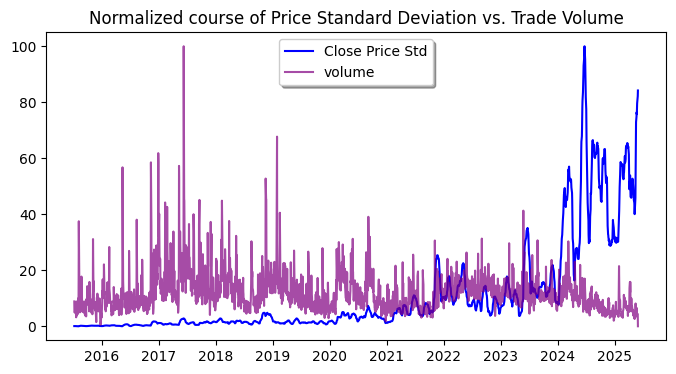

In [116]:
# visualisation of the std of the price, vs. the trade volume. 

df_rolling['volume'] = df['volume']
normalized = ((df_rolling - df_rolling.min()) / (df_rolling.max() - df_rolling.min())) *100

fig = plt.figure(figsize=(8, 4))
std = df_rolling['std']
volume = df_rolling['volume']
plt.plot(normalized.index, normalized['std'], label='Close Price Std', color='blue', alpha=0.7)
plt.plot(normalized.index, normalized['volume'], label='volume', color='purple', alpha=0.7)
plt.ylabel('')
plt.title('Normalized course of Price Standard Deviation vs. Trade Volume')
plt.legend(loc='best', shadow=True)

There is some correlation, increasing with the time, between the volatility of the price (std), and the trade volume: 
with more volatility there are more transactoins - both in up and downtrends, which increase the trade volume. 
or, with increasing volume in one price direction (up or down), it drives the change in the price even further in the same direction

Text(0.5, 1.0, 'Nvidia trade volume distribution, (USD mln)')

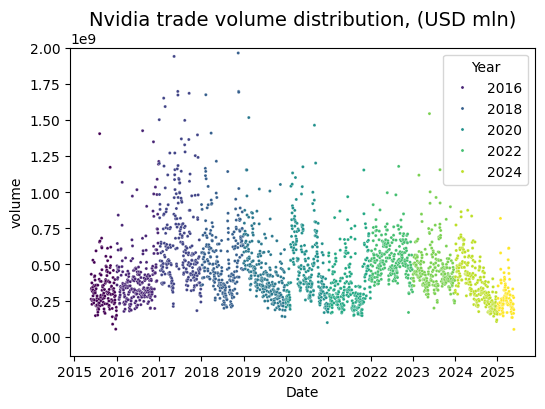

In [ ]:
# Trade Volume Spread

plt.figure(figsize=(6,4))
ax = sns.scatterplot(palette='viridis', s=5, data=df, x=df.index, y='volume', hue= df.index.year,)
ax.set_xlabel('Date')
ax.set_ylim(top=2.0e9)
plt.legend(title='Year') 
plt.title('Nvidia trade volume distribution, (USD mln)', fontsize=14)

## plotting the volume as a scatter plot, not as a bar plot, helps see that mainly the volume remains stable, although very volatile.

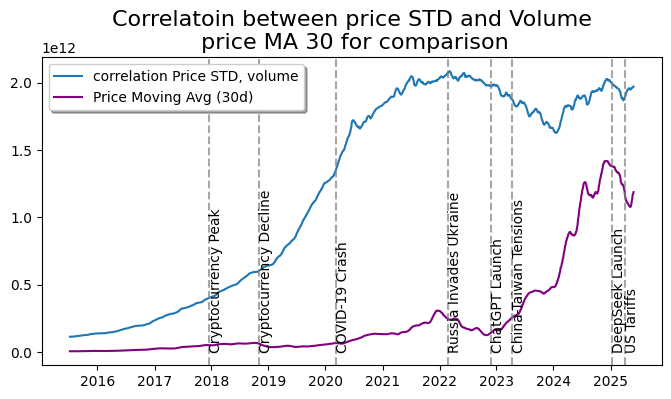

In [130]:
# accurate plotting of the correlation between price STD and volume
# original price for comparison

corr = sp.signal.correlate(std, volume, mode='same')
fig = plt.figure(figsize=(8,4))
plt.plot(df_rolling.index, corr, label='correlation Price STD, volume')
plt.plot(df_rolling.index, df_rolling['roll30'] * 1e10, label='Price Moving Avg (30d)', color='purple')
plt.title(f'Correlatoin between price STD and Volume\n price MA 30 for comparison', fontsize=16)
plt.legend(loc='best', shadow=True)
for label, date in event_dates.items():
    plt.axvline(x=date, color='gray', linestyle='--', alpha=0.7)
    plt.text(date, plt.ylim()[0]*0.05, label, rotation=90, verticalalignment='bottom', fontsize=10, color='black')




To complete the picture: 
heatmap of the price and volume correlation, in different points in time

In [89]:
#pca: 
# volume, price ... howt o decide which ones makes different by reducing the dimentions of the vector bcz the data is multi dimensioal
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



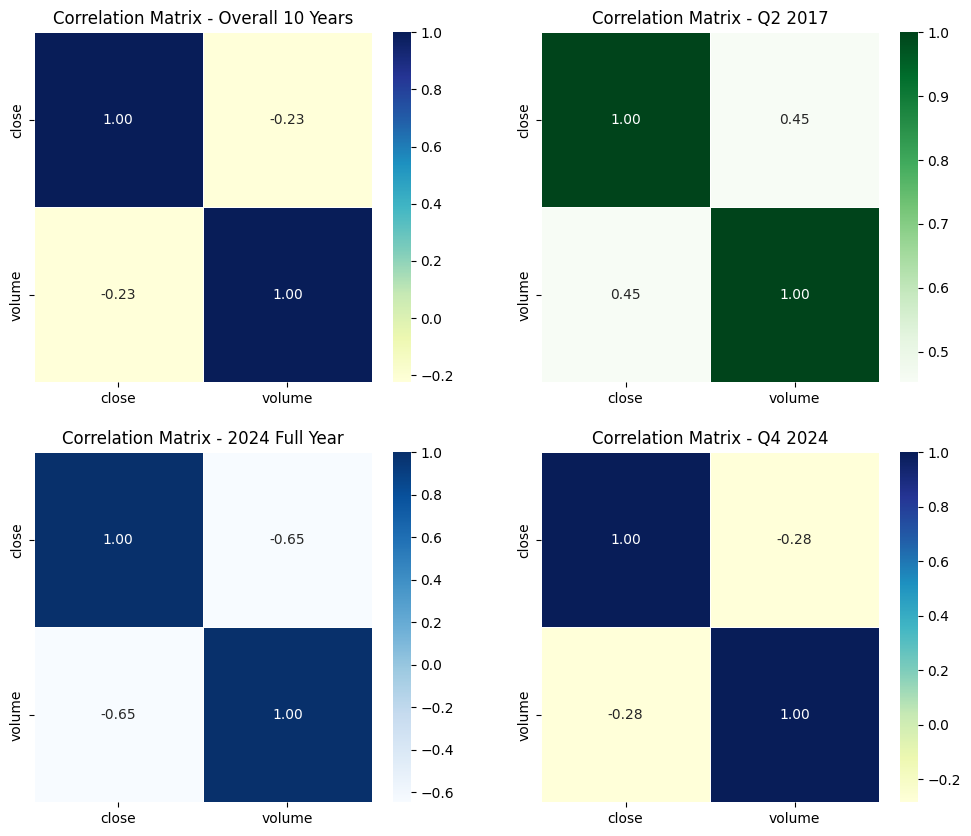

<Figure size 400x400 with 0 Axes>

In [175]:
# in light of the unclear relationship between volume and price (close price), let's see if there is even a correlation: 

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
corr_price_vol = df[['close', 'volume']].corr()
corr_price_vol_q2_2017 = df[['close', 'volume']].loc[(df.index.year == 2017) & (df.index.quarter == 2)].corr()
corr_price_vol_2024 = df[['close', 'volume']].loc[df.index.year == 2024].corr()
corr_price_vol_q4_2024 = df[['close', 'volume']].loc[(df.index.year == 2024) & (df.index.quarter == 4)].corr()

plt.figure(figsize=(4,4))
sns.heatmap(corr_price_vol, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=0.5, linecolor='white', ax=axes[0,0])
axes[0, 0].set_title(f"Correlation Matrix - Overall 10 Years")
axes[0, 1].set_title(f"Correlation Matrix - Q2 2017")
axes[1, 0].set_title(f"Correlation Matrix - 2024 Full Year")
axes[1, 1].set_title(f"Correlation Matrix - Q4 2024")
sns.heatmap(corr_price_vol_q2_2017, annot=True, fmt=".2f", cmap='Greens', linewidths=0.5, linecolor='white', ax=axes[0,1])
sns.heatmap(corr_price_vol_2024, annot=True, fmt=".2f", cmap='Blues', linewidths=0.5, linecolor='white', ax=axes[1,0])
sns.heatmap(corr_price_vol_q4_2024, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=0.5, linecolor='white', ax=axes[1,1])

plt.tight_layout()
plt.show()


### PCA
https://builtin.com/data-science/step-step-explanation-principal-component-analysis
benefits: 
smaller data sets are easier to explore and visualize

What are Principal components?
Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. 

Calculation: 
the first principal component accounts for the largest possible variance in the data set
it’s essentially the line that maximizes the variance (the average of the squared distances from the projected points (red dots) to the origin).
The second principal component is uncorrelated with (i.e., perpendicular to) the first principal component and it accounts for the next highest variance.

This continues until a total of p principal components have been calculated, equal to the original number of variables.

Steps: 

Standardize the range of continuous initial variables: for an equal contribution of  each of the variables.
Compute the covariance matrix to identify correlations: highly correlated variables are identified.
Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components: the eigenvalues show which component is the most significant
Create a feature vector to decide which principal components to keep: choose whether to keep all these components or discard those of lesser significance (of low eigenvalues), and form with the remaining ones a matrix of vectors that we call Feature vector: , the feature vector is simply a matrix that has as columns the eigenvectors of the components that we decide to keep.

Recast the data along the principal components axes:  use the feature vector formed using the eigenvectors of the covariance matrix, to reorient the data from the original axes to the ones represented by the principal components, by multiplication: Feature_vVector * Standardized_dataset


In [ ]:
pca_df = df.copy()
pca_df.reset_index(inplace=True)
pca_df.drop(columns=['index', 'dividends', 'stock_splits'], inplace=True)

# standardize: 
x = StandardScaler().fit_transform(pca_df.values) 


In [ ]:
# calculate PCA 2D:
p = PCA(n_components=2)
pca = p.fit_transform(x)

p_df = pd.DataFrame(data = pca, columns=['PC1', 'PC2'])


In [104]:
p_df

,PC1,PC2
0,-1.24,-0.74
1,-1.24,-0.71
2,-1.26,-0.56
3,-1.18,-1.14
4,-1.19,-1.04
...,...,...
2511,5.76,0.06
2512,5.79,-0.27
2513,5.68,-0.24
2514,5.89,-0.24


explained pc ratio: [0.81300075 0.18681422]


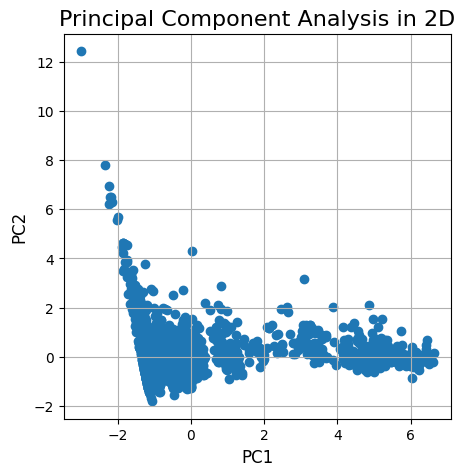

In [131]:
# plot PCA
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize=12)
ax.set_ylabel('PC2', fontsize=12)
ax.set_title('Principal Component Analysis in 2D', fontsize=16)
ax.scatter(p_df['PC1'], p_df['PC2'])
ax.grid()
print(f'explained pc ratio: {p.explained_variance_ratio_}')

In [144]:
# the impact of each pc (eigenvalues of the SVD)
p.explained_variance_

array([4.06662008, 0.9344425 ])

In [188]:
4.06 / (4.06+0.93)

0.8136272545090181

In [143]:
# loading scores of each of the variables into the PCs:

loadings = pd.DataFrame(p.components_.T, columns=['PC1', 'PC2'], index = list(pca_df.columns))
loadings

,PC1,PC2
open,0.49,0.07
high,0.49,0.08
low,0.49,0.07
close,0.49,0.07
volume,-0.15,0.99


### testing for anomalies    

the most direct and visual method to check for anomalies, we can check for rolling std: 
the idea is to calculate standard deviation for an ever increasing time window (up to a year). 
whenever the std is increasing unproportionally, we should find an anomaly: 
Importantt disadvantage of this analysis, in the beginning of the period we would always see high differences, but this is due to the lack of aggregated data in the beginning of the measured period. From this visualization we can really connect influences of hte one time events to sharp movement in the share price, while some of them had a long term period, such as the beginning of the blockchain wave, and the launch of the language model, and some remained contained, such as the covid-19 virus waves, after the markets stabilized. 
Given this information, we can decide what to do with the a-normal pattern - one option would be to replace it with mean of other periods, for example, for futher analysis, but it really depends on the data, the use case and the purpose of the data analysis. 

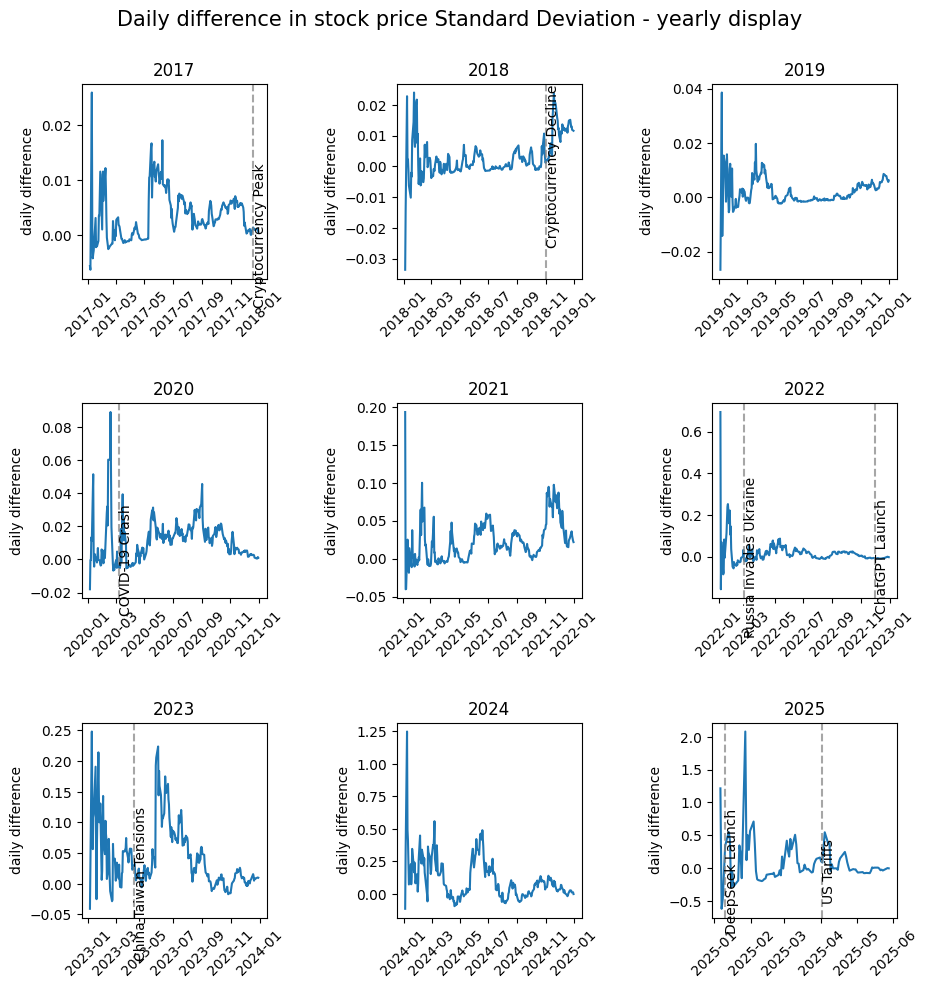

In [ ]:
# rolling standard deviation
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
axes = axes.flatten()

for i, year in enumerate(range(2017, df.index[-1].year + 1)):

    year_df = df[['close']].loc[df.index.year==year].copy()
    # calculate rolling std for each day of the year
    rolling_dev = pd.Series(dtype=float, index=year_df.index)
    for date in rolling_dev.index:
        window = year_df.loc[:date]['close']
        rolling_dev.loc[date] = window.std()
    
    # calculate the difference in stds  between each day: 
    diff_rolling_dev = rolling_dev.diff()
    diff_rolling_dev.dropna(inplace=True)

    # plot the differences: 
    axes[i].plot(diff_rolling_dev)
    axes[i].set_title(f'{year}')
    axes[i].set_ylabel('daily difference')

    # set x labels direction: 
    for label in axes[i].get_xticklabels():
        label.set_rotation(45)
    
    # paint special events: 
    for label, date in event_dates.items():
        if date.year == year:
            axes[i].axvline(x=date, color='gray', linestyle='--', alpha=0.7)
            axes[i].text(date, plt.ylim()[0]*0.05, label, rotation=90, verticalalignment='center', fontsize=10, color='black')
plt.tight_layout(pad=3.0)
plt.suptitle('Daily difference in stock price Standard Deviation - yearly display', fontsize=15, y=1.01)

plt.show()


In [ ]:
# use STL:  seasonal trend decomposition
# periods-63 - 63 data points (=trading days in a fiscal quarter) in each period, to create quarterly seasonality
from statsmodels.tsa.seasonal import STL 
seasonal = df[['close']].loc[df.index.year > 2020]
stl = STL(seasonal, period=63, robust=True)
result = stl.fit()

seasonality, trend, residual = result.seasonal, result.trend, result.resid 

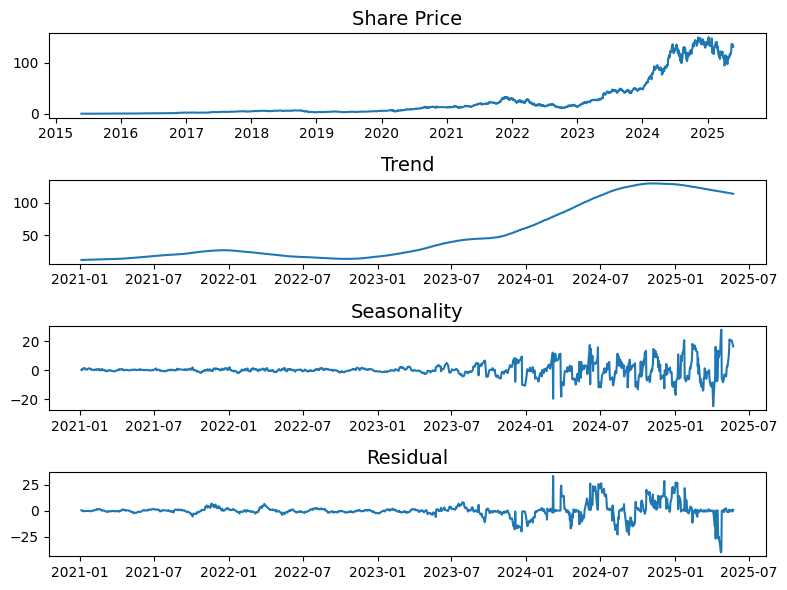

In [ ]:
# plot decomposition: 

plt.figure(figsize=(8,6))
plt.subplot(4,1,1)
plt.plot(df.close)
plt.title('Share Price', fontsize=14)
plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=14)
plt.subplot(4,1,3)
plt.plot(seasonality)
plt.title('Seasonality', fontsize=14)
plt.subplot(4,1,4)
plt.plot(residual)
plt.title('Residual', fontsize=14)

plt.tight_layout()

a more robust analysis for anomalies is decomposition of the time series to trend, seasonality and residual, using the LOESS model.  This composition was done here on a quarterly mean basis. And the the seasonality repeating pattern as seen in figure 9, might be  connected to quarterly publication of the financial statmentes and regular dividend distributions, increasing in the later years where the company profits increased significantly. 
For anomaly detection, we have to look at the residual patterns.  
Every spike in the residual could be treated as an anomaly and be checked further. we can decide on a treshold level of changes in the residual, commonly accepted 3 standard deviations, by which each of the occurances could be further examined, and later on decide whether or not it is important for further modeling. such an inspection is done in figure 10, focusing on later years, where the fluctuations in the residuals are more visible. 

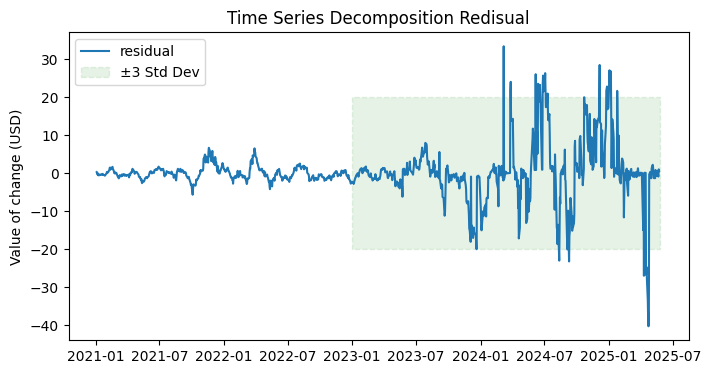

In [ ]:
# plot residual segnificant changes (threshold = 3std)
resid_m = residual.mean()
resid_std = residual.std()
lower = resid_m - 3 * resid_std
upper = resid_m + 3 * resid_std

plt.figure(figsize =(8,4))
plt.plot(residual, label='residual')
plt.title('Time Series Decomposition Redisual')
plt.ylabel('Value of change (USD)')
plt.fill_between([datetime(2023,1,1), datetime.today()], lower, upper, color='g', alpha=0.1, linestyle='--', label='±3 Std Dev')
plt.legend(loc='best')

last attempt at removing the anomalies would be garch model: 
this model assumes that the value of the time series today is some transformation of the value one period (one day) ago, in addition to a random error.
Similarly it assumes that the volatility for this time $t_0$, is a transformation of the volatility in the previous period $t-1$.
The Garch model is used in cases where the volatility is not steady, rather is charactarized by bursts of highs and lows. 
Checking which Garch model is best for the use case will be done in testing the PACF of the returns, squared - i 

just as a last check, let's see if we get different results with rolling average for 2017, plotting the price and volume, 
just to make sure we do not see any trends, as the correlation heatmap shows: 